<a href="https://colab.research.google.com/github/EytanTsytkin/DataScienceShorts/blob/main/EthereumFeaturesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

sns.set_style('dark')

In [161]:
data = pd.read_csv('address_features_2.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (45) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26063 entries, 0 to 26062
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    26063 non-null  int64  
 1   lifetime                      26063 non-null  float64
 2   total_txes                    26063 non-null  int64  
 3   first_tx                      26063 non-null  int64  
 4   first_outgoing_tx             23016 non-null  float64
 5   tx_freq_mean                  23960 non-null  float64
 6   incoming_tx_freq_mean         8161 non-null   float64
 7   outgoing_tx_freq_mean         12941 non-null  float64
 8   tx_freq_median                23960 non-null  float64
 9   incoming_tx_freq_median       8161 non-null   float64
 10  outgoing_tx_freq_median       12941 non-null  float64
 11  tx_freq_std                   16427 non-null  float64
 12  incoming_tx_freq_std          22596 non-null  float64
 13  o

In [167]:
for col in data.columns:
  if data[col].isna().sum() == data.shape[0] or col == 'Unnamed: 0':
    data.drop(col,axis=1,inplace=True)

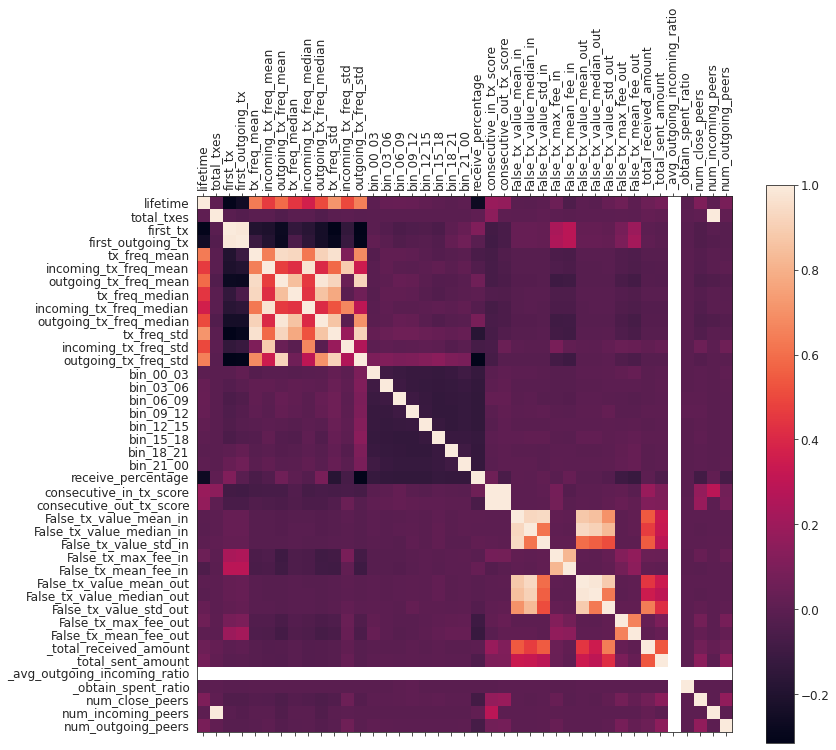

In [168]:
sns.set_style('white')
# Lets use a correlation matrix to gain some insight regarding correlation to label:
f = plt.figure(figsize=(12, 10))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=12, rotation=90)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)

In [169]:
sns.set_style('darkgrid')

Text(0.5, 1.0, 'Time between first and last tx')

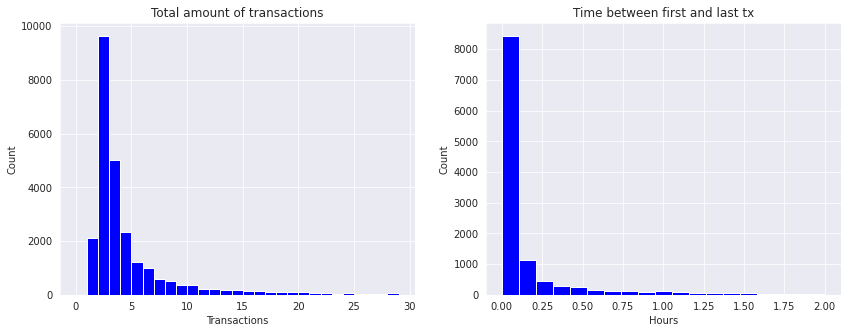

In [221]:
plt.subplots(figsize=(14,5))

plt.subplot(1, 2, 1)
plt.hist(data['total_txes'],range(30),color='blue')
plt.title('Total amount of transactions')
plt.ylabel('Count')
plt.xlabel('Transactions')

plt.subplot(1, 2, 2)
plt.hist(data['lifetime'],np.linspace(0,2,20),color='blue')
plt.ylabel('Count')
plt.xlabel('Hours')
plt.title('Time between first and last tx')


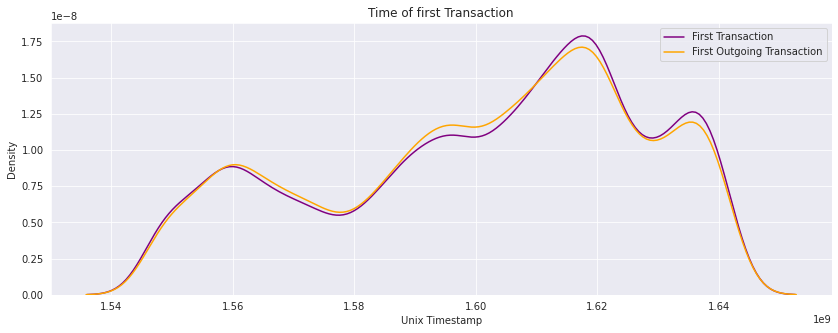

In [223]:
plt.figure(figsize=(14,5))
sns.kdeplot(data['first_tx'],color='purple',label='First Transaction')
sns.kdeplot(data['first_outgoing_tx'],color='orange',label='First Outgoing Transaction')
plt.title('Time of first Transaction')
plt.xlabel('Unix Timestamp')
plt.ylabel('Density')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Time between first Transaction to first ourgoing Transaction')

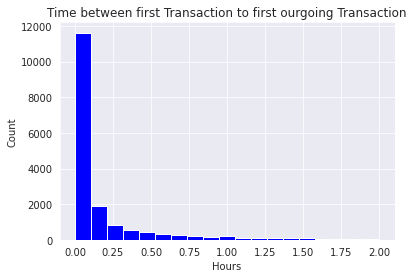

In [229]:
plt.hist((data['first_outgoing_tx']-data['first_tx'])/3600,np.linspace(0,2,20),color='blue')
plt.xlabel('Hours')
plt.ylabel('Count')
plt.title('Time between first Transaction to first ourgoing Transaction')

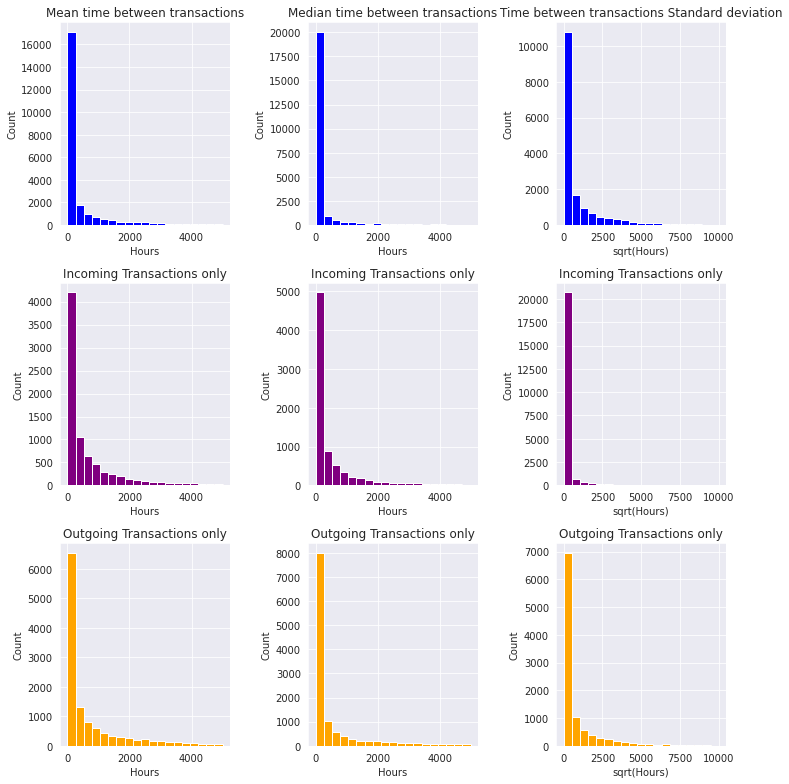

In [220]:
fig, axes = plt.subplots(3,3,figsize=(11,11))

cols = ['tx_freq_mean','tx_freq_median','tx_freq_std',
        'incoming_tx_freq_mean','incoming_tx_freq_median','incoming_tx_freq_std',
        'outgoing_tx_freq_mean', 'outgoing_tx_freq_median', 'outgoing_tx_freq_std']

titles = ['Mean time between transactions','Median time between transactions','Time between transactions Standard deviation',
          'Incoming Transactions only','Incoming Transactions only','Incoming Transactions only',
          'Outgoing Transactions only','Outgoing Transactions only','Outgoing Transactions only']

colors = ['blue','blue','blue','purple','purple','purple','orange','orange','orange']

for idx,ax in enumerate(axes.flatten()):
  if '_std' in cols[idx]:
    ax.hist(data[cols[idx]],np.linspace(0,10000,20),color=colors[idx])
    ax.set_title(titles[idx])
    ax.set_ylabel('Count')
    ax.set_xlabel('sqrt(Hours)')
  else:
    ax.hist(data[cols[idx]],np.linspace(0,5000,20),color=colors[idx])
    ax.set_title(titles[idx])
    ax.set_ylabel('Count')
    ax.set_xlabel('Hours')

plt.tight_layout()